<a href="https://colab.research.google.com/github/unpackAI/DL101/blob/main/Week_1_Computer%20Vision/01_CV_SolutionWorkbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💻Week 1 Workbook of unpackAI "DL101 Bootcamp"


## 📕 Learning Objectives of the Week

* Understand the fundamental process of building your own image classification project.

In [1]:
#@title ## 🔗 Install & Import Required Code Packages
!pip install -Uqq fastbook
!pip install -Uqq unpackai
from unpackai.utils import clean_error_img
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 720 kB 28.0 MB/s 
     |████████████████████████████████| 188 kB 70.3 MB/s 
     |████████████████████████████████| 1.2 MB 62.6 MB/s 
     |████████████████████████████████| 60 kB 8.3 MB/s 
     |████████████████████████████████| 73 kB 2.8 MB/s 
     |████████████████████████████████| 95 kB 5.5 MB/s 


## unpackAI Assignment Section

 
*   **Assignment 1**: Go through the multiple choice questions below and choose the correct answer. Discuss during the presentation session.
*   **Assignment 2**: Build an entire single label classification model starting from defining your objective, gathering data to training your model and interpreting the results.

## Assigment 1: Go through the multiple choice questions below and choose the correct answer. Discuss during the presentation session.

1. What is overfitting?

> A: Overfitting is a scenario in data science where a data model is unable to capture the relationship between the input and output variables accurately, generating a high loss on both the training set and unseen data.

> B: Overfitting happens when a model learns and memorizes the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This results in a further decreasing loss on the training set but an increasing loss on the validation set.-

> C: Overfitting is when the model is performing very well on the training, validation and test set and achieves a very low loss in all 3 data sets. This means that your model is ready to be used in practice.


2. What is a training, validation and test set?

> A: The *training set* is the sample of data used to start fitting and training the model. The *test set* is the sample of data used to evaluate the trained models performance on new data while continuing to improve and tune the model's parameters. The *validation set* is the sample of data used to evaluate the final model without continuing to tune its parameters.

> B: The *test set* is the sample of data used to start fitting and training the model. The *training set* is the sample of data used to evaluate the trained models performance on new data while continuing to improve and tune the model's parameters. The *validation set* is the sample of data used to evaluate the final model without continuing to tune its parameters.

> C: The *training set* is the sample of data used to start fitting and training the model. The *validation set* is the sample of data used to evaluate the trained models performance on new data while continuing to improve and tune the model's parameters. The *test set* is the sample of data used to evaluate the final model without continuing to tune its parameters.-

3. Observe the `Learner` that you have encountered in the Coursebook. What are the key **metrics** to represent the model's performance? Name and explain them.

> A: The key metrics are *epochs* and *time*. Both give us key insights how much memory the model requires and its performance.

> B: The key metrics are *train_loss*, *valid_loss* and *error rate / accuray*. Each metric provides insights on the model's performance on the training set, validation set and test set.-

> C: The single most important metric is the *loss*. The loss is what tells the machine and human how the model performs.

4. What is the difference between Classification and Regression in Machine Learning?

> A: A *classification model* is one that attempts to predict a class, or category. That is, it's predicting from a number of discrete possibilities, such as "dog" or "cat". A *regression model* is one that attempts to predict one or more numeric quantities, such as a temperature or a location.-

> B: A *regression model* is one that attempts to predict a class, or category. That is, it's predicting from a number of discrete possibilities, such as "dog" or "cat". A *classification model* is one that attempts to predict one or more numeric quantities, such as a temperature or a location.

> C: A *classification model* is one that attempts to utilize sorting algorithms that can allow it to learn time-dependent patterns across multiples models different from images and speech. A *regression model* is one that attempts to to predict the "rating" or "preference" a user would give to an item.

5. What is transfer learning in Machine Learning?

> A: Transfer learning is a machine learning technique where the parameters of a model are not updated through model training but simply replaced by the parameters of another pre-trained model.

> B: Transfer learning is a technique where a machine learning engineer uses his expertise and techniques in another industry to a problem in an industry he does not have much experience in.

> C: A: Transfer learning is a machine learning technique where a pre-trained model is re-purposed on a second related task. In practice this means that, we use an existing already-trained model and its trained "intelligence" to utilize it for our own use case.-

## Assignment 2: Build an entire single label classification model starting from defining your objective, gathering data to training your model and interpreting the results.

### Step One - Translate a Business Goal to Machine Learning Task

#### 1. Define the objective (what goal, metrics to measure success)
**Your objective:** The goal is to build a model that can identify the differnce between various birds of prey. The model should not be confused by other birds that are not in the main classes.

#### 2. Describe your dataset (what data, how many classes etc.)
**Your dataset:** My Dataset contains over 100 images in each class which are four types of raptor: Eagle, Hawk, Kestral and Owl. There is also a dataset of random bird images.

**NOTE:** during the testing phase we noticed that without the 5th class "birds" the model tried to fit the image into one of the four classes, after adding the 5th class the model works better. *italicized text*

#### 3. Describe your model (what is the model supposed to do)
**Your model:** A 5-class single label classification model, which correctly classifies the type of raptor.


### Step Two - Collect and construct your dataset

In [2]:
!pip install -q jmd_imagescraper
from jmd_imagescraper.imagecleaner import *
from pathlib import Path
from jmd_imagescraper.core import *

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path = Path('/content/gdrive/MyDrive/unpackAI/DL101/images')
number_images_to_download = 150

duckduckgo_search(path, "Eagle", "photos of birds eagle", max_results=number_images_to_download)
duckduckgo_search(path, "Owl", "photos of birds owl", max_results=number_images_to_download)
duckduckgo_search(path, "Hawk", "photos of birds hawk", max_results=number_images_to_download)
duckduckgo_search(path, "Kestral", "photos of birds Kestral", max_results=number_images_to_download)
duckduckgo_search(path, "Birds", "photos of birds", max_results=number_images_to_download) #random images of birds not in the above classes

Duckduckgo search: photos of birds eagle


Exception occured while retrieving https://tse3.mm.bing.net/th?id=OIP.6OEbapB9z3QvQYYZmpTZMgHaHa&pid=Api
Duckduckgo search: photos of birds owl


Duckduckgo search: photos of birds hawk


Duckduckgo search: photos of birds Kestral


Duckduckgo search: photos of birds


[Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds/151_34d7e027.jpg'),
 Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds/152_76cc1ff4.jpg'),
 Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds/153_e60412ac.jpg'),
 Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds/154_c532bff0.jpg'),
 Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds/155_269ecdcd.jpg'),
 Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds/156_6681f51a.jpg'),
 Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds/157_521e6232.jpg'),
 Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds/158_6c0f4734.jpg'),
 Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds/159_4f3d72b5.jpg'),
 Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds/160_9fca4695.jpg'),
 Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds/161_c82c536c.jpg'),
 Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds/162_12fe6972.jpg'),
 Path('/content/gdrive/MyDrive/unpackAI/DL101/images

In [5]:
# path.ls() allows you to make sure that the differnt classes have been created,
# in this case it is five folders. Make sure all five are there and that there are
# no extra files.
path.ls()

(#5) [Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Eagle'),Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Owl'),Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Hawk'),Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Kestral'),Path('/content/gdrive/MyDrive/unpackAI/DL101/images/Birds')]

##### Displaying the image cleaner

Use this to get rid of unsuitable images without leaving your notebook.

In [6]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

Some time especially in real life projects, erronous image is a frequently occuring thing, you can fix the problem by deleting all of our faulty images. 

**We leave it up to you to finish your own model using your own dataset!**

In [7]:
clean_error_img(path)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/299 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

### Step Three - Data Transformation: Create your **DataLoaders** and utilize **Data Augmentation Methods** to improve your dataset.

> Hint: Make sure to define your path so that it points to your main folder that contains your labeled folders with the images. A great way to do that is to use the *folder* icon on the left, to find the right folder, right click and *copy path*.



In [8]:
raptors = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = raptors.dataloaders(path)

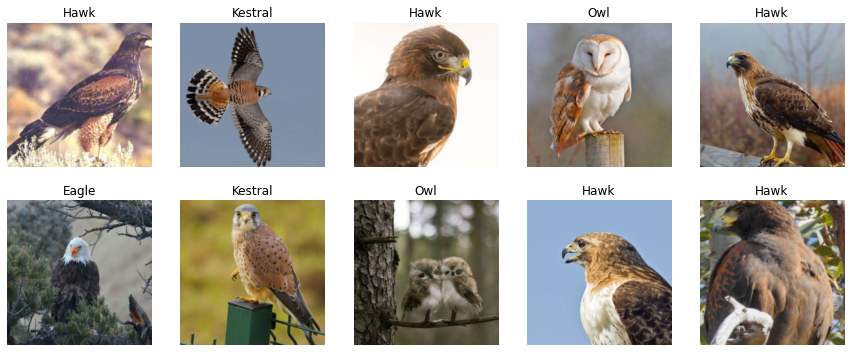

In [9]:
dls.valid.show_batch(max_n=10, nrows=2)

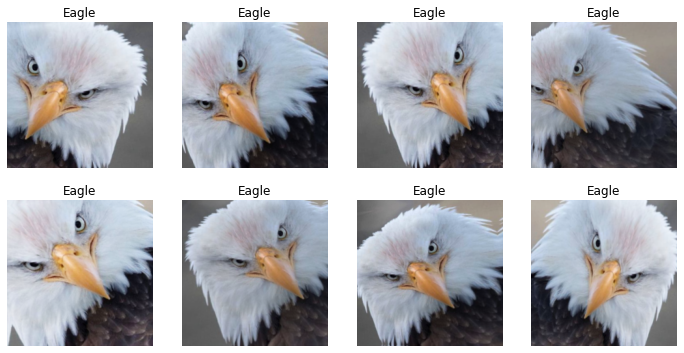

In [10]:
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Step Three - Train your model.

In [11]:
#check that your GPU is active before training.
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.747137,0.433409,0.872910,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.681554,0.325536,0.906354,00:11
1,0.549454,0.294532,0.919732,00:12
2,0.436039,0.227691,0.943144,00:15
3,0.364822,0.218176,0.943144,00:11


### Step Four - Interpret the model and make predictions: Create a notebook app to upload and classify external images.

> Hint: Utilize the *top losses* and *classification marix* methods seen in the coursebook to interpret your model.


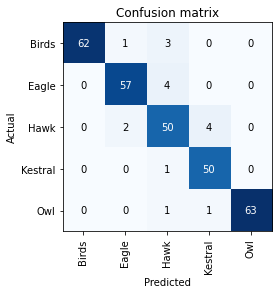

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

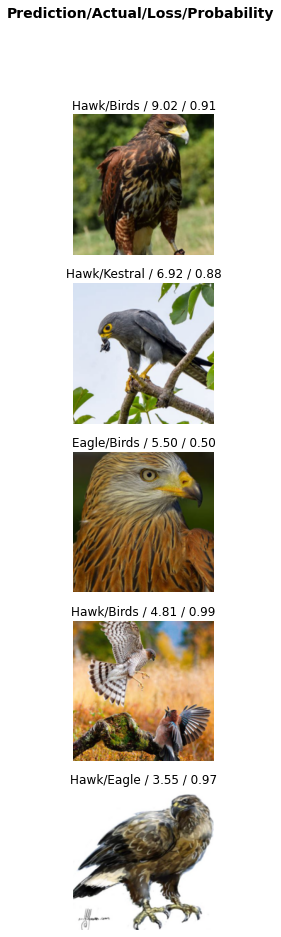

In [14]:
#@title Getting a visual result for the top losses
interp.plot_top_losses(5, nrows=5)

In [15]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [16]:
#@title Delete or change classes of images as indicated in the `ImageClassifierCleaner`
for idx in cleaner.delete(): cleaner.fns[idx].unlink() #Delete
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat) #Change Class

In [17]:
#@title If you delete or change the data set you must reload the data blocks and data loaders
masks = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)
dls = masks.dataloaders(path)

In [18]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.662866,0.536824,0.839465,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.612016,0.372349,0.906354,00:11
1,0.524708,0.373755,0.886288,00:11
2,0.429603,0.301928,0.923077,00:13
3,0.364507,0.279969,0.939799,00:11


In [19]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.702060,0.603273,0.816054,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.626844,0.388066,0.879599,00:12
1,0.504924,0.333786,0.909699,00:11
2,0.394927,0.287851,0.933110,00:11
3,0.343188,0.264367,0.953177,00:11


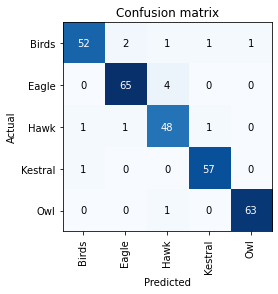

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [21]:
#@title Build the functionality of our Notebook App
uploader = widgets.FileUpload()
output = widgets.Output()
classify = widgets.Button(description='Classify')
prediction = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(uploader.data[-1])
    output.clear_output()
    with output: 
      display(img.to_thumb(254,254))
    pred, pred_idx, probs = learn.predict(img)
    prediction.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

classify.on_click(on_click_classify)

VBox([widgets.Label('Select your image!'), 
      uploader, classify, output, prediction])